# Markov chain receptor models 

## Symbolic vertex and edge labels

Recall the [three state model](ligands:three_state_model) discussed above ([Ligands](ligands)).  Using generic notation for the [path graph](example_graphs:path_graph) on three vertices,

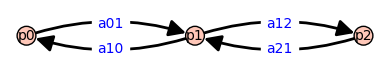

In [1]:
var('p0 p1 p2 a01 a10 a12 a21')
G=graphs.PathGraph(3).to_directed()
G.relabel({0:p0,1:p1,2:p2})
G.set_edge_label(p0,p1,a01)
G.set_edge_label(p1,p0,a10)
G.set_edge_label(p1,p2,a12)
G.set_edge_label(p2,p1,a21)
G.show(figsize=4,edge_labels=True)

We assign symbolic variables to the vertices and edges of {math}`G` because this allows us to produce symbolic expressions important quantities using methods available in `Sagemath`'s [module for graphs and digraphs](https://doc.sagemath.org/html/en/reference/graphs/index.html). For example, the weighted adjacency matrix associated with graph $G$ above is

In [2]:
A = G.weighted_adjacency_matrix()

The combinatorial Laplacian matrix is {math}`L=D-A` where {math}`D` is a diagonal matrix given by the column sum of {math}`A`.

In [3]:
L = diagonal_matrix(sum(A.T))-A
show(L)

[      a01      -a01         0]
[     -a10 a10 + a12      -a12]
[        0      -a21       a21]

```{note}
In the code block above, I prefer to write ```sum(A.T)``` rather than ```sum(A.columns())```, but these are equal.
```

In [4]:
sum(A.T) == sum(A.columns())

True

## Generator matrix of Markov chain 

The Markov chain with states and transistions of {math}`G` has a generator matrix {math}`Q` that is the opposite (additive inverse) of the Laplacian matrix ({math}`L`). That is, {math}`Q=-L=A-D`. We define a function that calculates the symbolic generator matrix $Q$ from the weighted adjacency matrix {math}`A`.

In [5]:
def generator(A):
    return A-diagonal_matrix(sum(A.T))

Calling the function ```generator()``` gives the result we expect:

In [6]:
Q = generator(A)
show(Q)

[      -a01        a01          0]
[       a10 -a10 - a12        a12]
[         0        a21       -a21]

Note that the sums of the columns are zero, reflecting the conservation of probability.

In [7]:
sum(Q.columns()) == sum(Q.T)

True

(markov_chain_tree_theorem_intro)=
## Markov chain tree theorem

Using the [Markov chain tree theorem](https://en.wikipedia.org/wiki/Markov_chain_tree_theorem), it is straightforward to find symbolic expressions for the steady-state probabilities of each receptor state (`p0`, `p1`, `p2`). The relative probabilities are given by the sum of the weights of all the spanning trees rooted in vertex `i`. Because this three-state receptor model has no cycles, there is only one directed spanning tree rooted in each vertex (shown below).

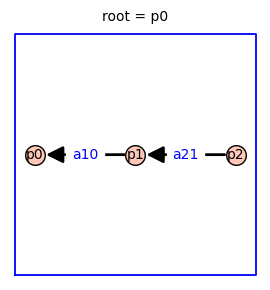

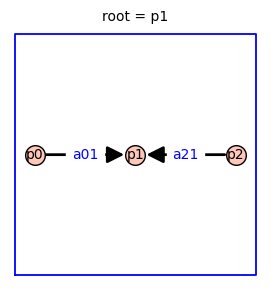

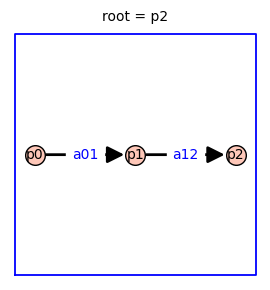

In [8]:
T0 = G.copy()
T1 = G.copy()
T2 = G.copy()

T0.delete_edge(p0,p1)
T0.delete_edge(p1,p2)

T1.delete_edge(p1,p0)
T1.delete_edge(p1,p2)

T2.delete_edge(p1,p0)
T2.delete_edge(p2,p1)

T0.show(figsize=4,edge_labels=True,title='root = p0',graph_border=True)
T1.show(figsize=4,edge_labels=True,title='root = p1',graph_border=True)
T2.show(figsize=4,edge_labels=True,title='root = p2',graph_border=True)

The relative probability of state `i` is given by the determinant of the Laplacian matrix with row `i` and column `i` removed. 
In this case, each relative probability is a monomial with two factors.

In [9]:
z0 = Q[[1,2],[1,2]].determinant().simplify_full()
z1 = Q[[0,2],[0,2]].determinant().simplify_full()
z2 = Q[[0,1],[0,1]].determinant().simplify_full()
print(f'[ z0 : z1 : z2 ] = [ {z0} : {z1} : {z2} ]')

[ z0 : z1 : z2 ] = [ a10*a21 : a01*a21 : a01*a12 ]


The normalized probabilities are:

In [10]:
zT = z0+z1+z2
p0 = z0/zT
p1 = z1/zT
p2 = z2/zT
show(table([[f'{p0=}'],[f'{p1=}'],[f'{p2=}']]))

p0=a10*a21/(a01*a12 + a01*a21 + a10*a21)
p1=a01*a21/(a01*a12 + a01*a21 + a10*a21)
p2=a01*a12/(a01*a12 + a01*a21 + a10*a21)


This three-state receptor model has no cycles.  For this reason the steady-state probabilities will satisfy detailed balance. This  implies that the steady-state probability distribution can be written in terms of equilibrium constants (as opposed to rate constants).  Define equilibrium constants as {math}`\kappa_{j}=a_{ij}/a_{ji}` for {math}`i < j` whenever vertex {math}`i` and {math}`j` are adjacent. 
Dividing the numerator and denominator of each {math}`p_i` by {math}`a_{10}a_{21}` yields

\begin{equation}
p_0 = \frac{1}{1+\kappa_1+\kappa_1\kappa_2} \quad p_1 = \frac{\kappa_1}{1+\kappa_1+\kappa_1\kappa_2} \quad p_2 = \frac{\kappa_1 \kappa_2}{1+\kappa_1+\kappa_1\kappa_2}
\end{equation}

This confirms that the steady-state probabilities of this three-state receptor model can be written in terms of equilibrium constants.